In [21]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import ensemble
from sklearn import svm
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

import optuna

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [22]:
df = pd.read_csv('data.csv')
df = df[df['Cholesterol Total (mg/dL)'] != 187]
df.set_index('Responden', inplace=True)
target = df['Cholesterol Total (mg/dL)']
df.drop('Cholesterol Total (mg/dL)', axis=1, inplace=True)
df.head()

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir
Responden,,,,,,,,,,,,,,
10,M,20.0,120.0,80.0,179.0,80.95,25.26,90.0,80.0,89.0,26.4,6.0,2.0,Bandung
49,F,22.0,120.0,80.0,163.0,51.35,19.32,68.0,84.0,89.0,29.8,2.0,0.0,Surabaya
53,F,22.0,90.0,70.0,155.5,50.70,21.00,65.0,84.0,53.0,26.4,6.0,0.0,Jakarta
55,F,22.0,100.0,60.0,150.0,42.40,18.84,64.0,84.0,61.0,31.1,2.0,0.0,Surabaya
109,F,23.0,110.0,70.0,166.0,56.60,20.54,74.0,84.0,147.0,26.4,6.0,9.0,Purworejo


In [23]:
# encoding Jenis Kelamin if M = 1 and F = 0

df["Jenis Kelamin"] = df["Jenis Kelamin"].apply(lambda x: 1 if x == 'M' else 0)

# drop Tempat lahir
df.drop('Tempat lahir', axis=1, inplace=True)
df.head()

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja
Responden,,,,,,,,,,,,,
10,1,20.0,120.0,80.0,179.0,80.95,25.26,90.0,80.0,89.0,26.4,6.0,2.0
49,0,22.0,120.0,80.0,163.0,51.35,19.32,68.0,84.0,89.0,29.8,2.0,0.0
53,0,22.0,90.0,70.0,155.5,50.70,21.00,65.0,84.0,53.0,26.4,6.0,0.0
55,0,22.0,100.0,60.0,150.0,42.40,18.84,64.0,84.0,61.0,31.1,2.0,0.0
109,0,23.0,110.0,70.0,166.0,56.60,20.54,74.0,84.0,147.0,26.4,6.0,9.0


In [24]:
y = df['new_target']
X = df.drop('new_target', axis=1)

KeyError: 'new_target'

In [ ]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
test = pd.read_csv('data1.csv')
# encoding Jenis Kelamin if M = 1 and F = 0
test.set_index('Responden', inplace=True)
test["Jenis Kelamin"] = test["Jenis Kelamin"].apply(lambda x: 1 if x == 'M' else 0)
target_test = test['Cholesterol Total (mg/dL)']
test.drop('Cholesterol Total (mg/dL)', axis=1, inplace=True)

In [ ]:
pred = model.predict(test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# target = target.apply(
#     lambda x: 1 if x == 187 else 0)

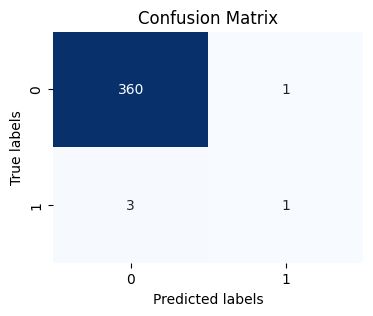

Probability of False Positive: 0.002770083102493075
Probability of False Negative: 0.75
Probability of True Positive: 0.0027397260273972603
Probability of True Negative: 0.9863013698630136
Accuracy: 0.989041095890411


In [ ]:
# from sklearn.metrics import confusion_matrix
# # Creating confusion matrix
# conf_matrix = confusion_matrix(target, pred)

# # Plotting confusion matrix
# plt.figure(figsize=(4, 3))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.title("Confusion Matrix")
# plt.show()


# # Extracting TP, TN, FP, FN from confusion matrix
# TN, FP, FN, TP = conf_matrix.ravel()

# # Total number of samples
# total_samples = len(target)

# # Calculating probability of false positives and false negatives
# false_positive_rate = FP / (FP + TN)
# false_negative_rate = FN / (FN + TP)

# print("Probability of False Positive:", false_positive_rate)
# print("Probability of False Negative:", false_negative_rate)

# # Calculating probability of true positive and true negative
# true_positive_probability = TP / total_samples
# true_negative_probability = TN / total_samples

# print("Probability of True Positive:", true_positive_probability)
# print("Probability of True Negative:", true_negative_probability)

# accuracy = (TP + TN) / total_samples

# print("Accuracy:", accuracy)

In [25]:
def rounding(pred):
    unique_target = target.unique()
    rounded_value = []
    for x in pred:
        best = unique_target[0]
        for val in unique_target:
            if abs(val-x) < abs(best-x):
                best = val
        rounded_value.append(best)
    return np.array(rounded_value)

In [30]:
reg_model = RandomForestRegressor()
reg_model.fit(df, target)
print(np.sqrt(mean_squared_error(target_test, rounding(reg_model.predict(test)))))

31.203266425431142
